Описание датасета - https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17?select=star_classification.csv

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [3]:
data = pd.read_csv('../input/stellar-classification-dataset-sdss17/star_classification.csv')

In [4]:
data.info() #пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
data.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
data.nunique(dropna=False) #смотрим на уникальные значения

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [7]:
data.drop('rerun_ID', axis=1) #одно уникальное значение - удаляем столбец

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [8]:
#посмотрим, как распределены значения класса
display(data['class'].unique())
data['class'].value_counts()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

<AxesSubplot:>

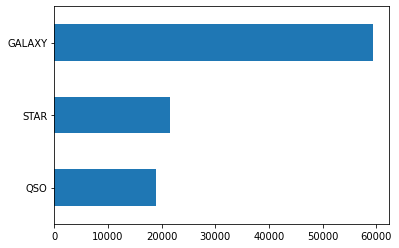

In [9]:
data['class'].value_counts(ascending=True).plot(kind='barh') # больше всего значений класса GALAXY

In [10]:
# Поиск выбросов
def outliers(col):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    perc25 = data[col].quantile(0.25)
    perc75 = data[col].quantile(0.75)
    l = perc25 - 1.5*IQR 
    r = perc75 + 1.5*IQR
    print("Для {0} IQR: {1}, ".format(col,IQR),"Границы выбросов: [{0}, {1}].".format(l, r))
    print('Всего {} выбросов'.format(data[data[col] > r][col].count() + data[data[col] < l][col].count()))

In [11]:
# числовые переменные
num_cols = [
    'alpha', 
    'delta', 
    'u',
    'g',
    'i',
    'r',
    'z',
    'redshift'
]

<AxesSubplot:>

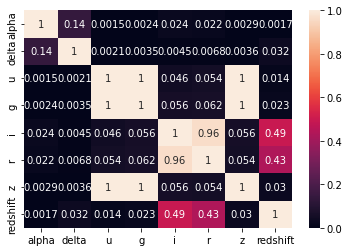

In [12]:
# построим матрицу корреляции для числовых переменных
# видно, что признаки слабо скореллированы друг с другом
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

In [13]:
# посмотрим на выбросы
outliers('alpha')
outliers('delta')
outliers('u')
outliers('g')
outliers('i')
outliers('r')
outliers('z')
outliers('redshift')

Для alpha IQR: 106.37678340379823,  Границы выбросов: [-32.04695356357384, 393.4601800516191].
Всего 0 выбросов
Для delta IQR: 34.75477923970864,  Границы выбросов: [-46.985398001625725, 92.03371895720883].
Всего 0 выбросов
Для u IQR: 3.3350875,  Границы выбросов: [15.349721250000002, 28.690071250000003].
Всего 56 выбросов
Для g IQR: 3.1585375000000013,  Границы выбросов: [14.227423749999996, 26.86157375].
Всего 99 выбросов
Для i IQR: 2.664210000000004,  Границы выбросов: [13.735969999999991, 24.392810000000008].
Всего 198 выбросов
Для r IQR: 2.908957499999996,  Границы выбросов: [13.772391250000007, 25.40822124999999].
Всего 132 выбросов
Для z IQR: 2.460442499999999,  Границы выбросов: [13.77001375, 23.611783749999997].
Всего 320 выбросов
Для redshift IQR: 0.64963748,  Границы выбросов: [-0.919939375, 1.678610545].
Всего 8990 выбросов


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


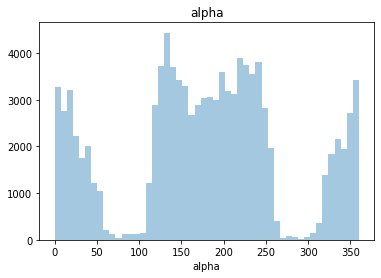

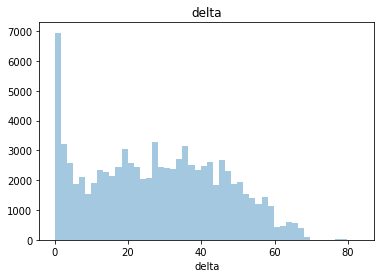

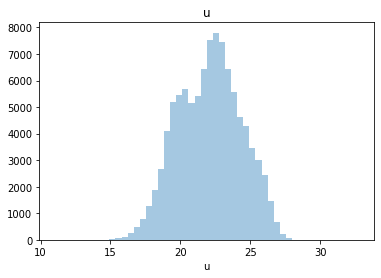

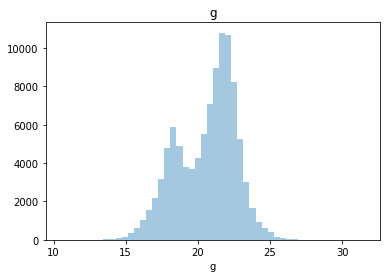

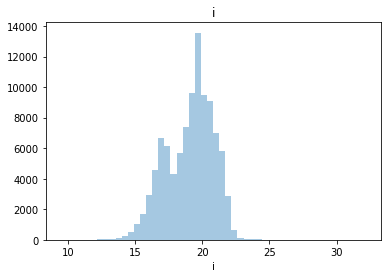

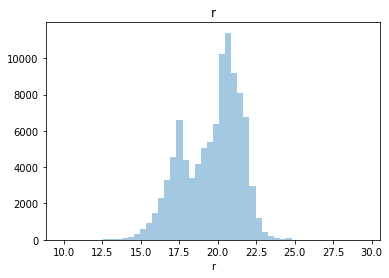

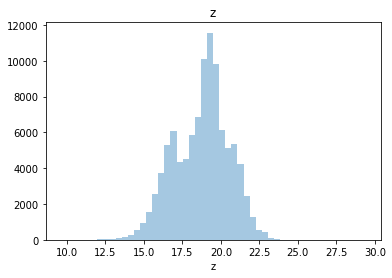

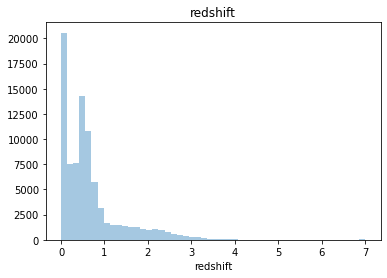

In [14]:
# посмотрим на распределение числовых признаков до удаления выбросов - признаки u, g, i, r, z имеют распределение, схожее с нормальным
for i in num_cols:
    plt.figure()
    sns.distplot(data[i][data[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [15]:
reds = data['redshift'].value_counts(bins = 5) # разделим значения признака на 5 категорий
reds

(-0.018000000000000002, 1.394]    88350
(1.394, 2.799]                     9910
(2.799, 4.203]                     1457
(5.607, 7.011]                      151
(4.203, 5.607]                      132
Name: redshift, dtype: int64

<AxesSubplot:>

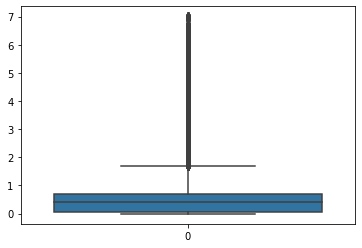

In [16]:
sns.boxplot(data=data['redshift']) # видим выбросы

In [17]:
# устраняем выбросы
data['redshift'] = data['redshift'][(data['redshift'] >= -0.92) & (data['redshift'] <= 1.7)]

<AxesSubplot:>

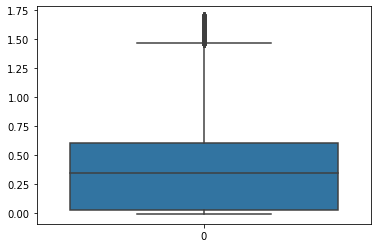

In [18]:
sns.boxplot(data=data['redshift'])

In [19]:
reds = data['redshift'].value_counts(bins = 5) # снова разделим значения признака на 5 категорий
reds

(-0.0127, 0.332]    44825
(0.332, 0.674]      28628
(0.674, 1.016]      10793
(1.016, 1.358]       3765
(1.358, 1.7]         3200
Name: redshift, dtype: int64

In [20]:
# пишем функцию для обработки диапазона
def func(reds_col):
    if -0.0127<reds_col['redshift']<=0.332:
        return '(-0.0127, 0.332)'
    if 0.332<reds_col['redshift']<=0.674:
        return '(0.332, 0.674)'
    if 0.674<reds_col['redshift']<=1.016:
        return '(0.674, 1.016)'
    if 1.016<reds_col['redshift']<=1.358:
        return '(1.016, 1.358)'                        
    else:
        return '(1.358, 1.7)' 

In [21]:
data['redshift_cat'] = data.apply(lambda reds_col:func(reds_col), axis = 1)
data['redshift_cat']

0          (0.332, 0.674)
1          (0.674, 1.016)
2          (0.332, 0.674)
3          (0.674, 1.016)
4        (-0.0127, 0.332)
               ...       
99995    (-0.0127, 0.332)
99996      (0.332, 0.674)
99997    (-0.0127, 0.332)
99998      (0.332, 0.674)
99999      (0.332, 0.674)
Name: redshift_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,redshift_cat'>

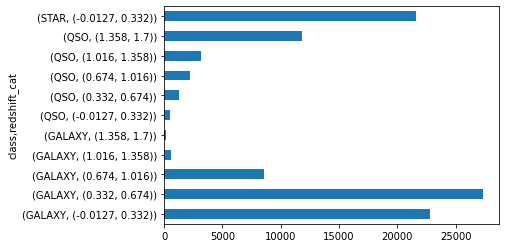

In [22]:
data.groupby(['class','redshift_cat'])['redshift_cat'].count().plot(kind='barh') # посмотрим на распределение признака redshift по признаку class

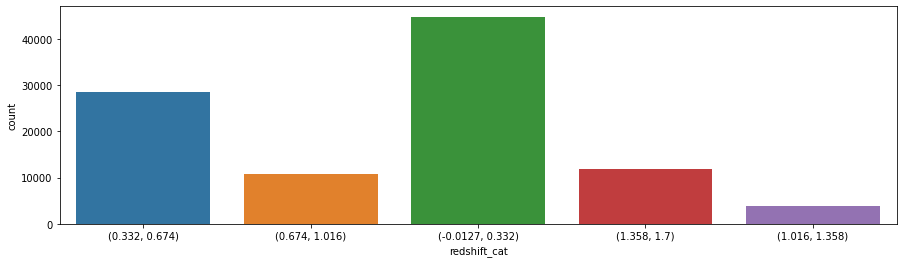

In [23]:
rr = sns.countplot(x='redshift_cat', data=data) # распределение количества записей по категориям
rr.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='redshift'>

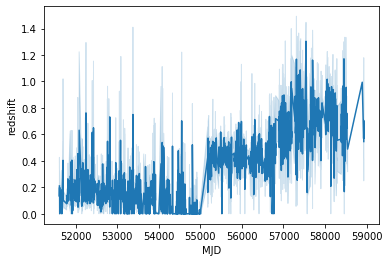

In [24]:
sns.lineplot(data=data, x="MJD", y='redshift') # посмотрим, как значения признака зависят от времени

In [25]:
a = data['alpha'].value_counts(bins = 5) # разделим значения признака на 5 категорий
a

(144.003, 216.002]    31268
(216.002, 288.001]    20382
(-0.355, 72.004]      17812
(72.004, 144.003]     16499
(288.001, 360.0]      14039
Name: alpha, dtype: int64

<AxesSubplot:>

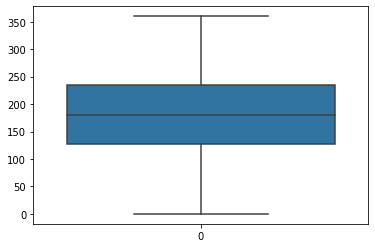

In [26]:
sns.boxplot(data=data['alpha']) # выбросов нет

In [27]:
# пишем функцию для обработки диапазона
def func2(alpha_col):
    if -0.355<alpha_col['alpha']<=72.004:
        return '-0.355, 72.004)'
    if 72.004<alpha_col['alpha']<=144.003:
        return '(72.004, 144.003)'
    if 144.003<alpha_col['alpha']<=216.002:
        return '(144.003, 216.002)'
    if 216.002<alpha_col['alpha']<=288.001:
        return '(216.002, 288.001'                        
    else:
        return '(288.001, 360.0)'

In [28]:
data['alpha_cat'] = data.apply(lambda alpha_col:func2(alpha_col), axis = 1)
data['alpha_cat']

0         (72.004, 144.003)
1        (144.003, 216.002)
2         (72.004, 144.003)
3          (288.001, 360.0)
4          (288.001, 360.0)
                ...        
99995       -0.355, 72.004)
99996       -0.355, 72.004)
99997     (216.002, 288.001
99998    (144.003, 216.002)
99999    (144.003, 216.002)
Name: alpha_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,alpha_cat'>

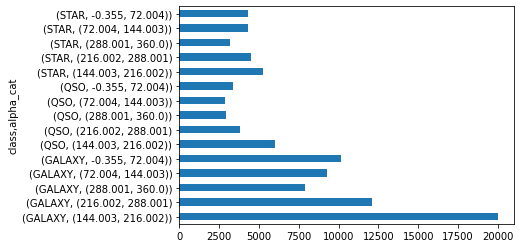

In [29]:
data.groupby(['class','alpha_cat'])['alpha_cat'].count().plot(kind='barh') # посмотрим на распределение признака alpha по признаку class

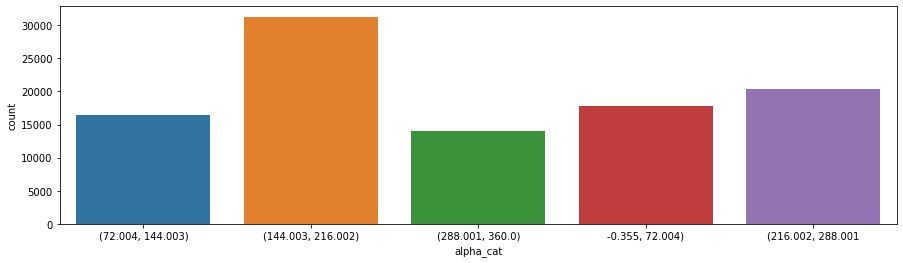

In [30]:
aa = sns.countplot(x='alpha_cat', data=data) # распределение количества записей по категориям
aa.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='alpha'>

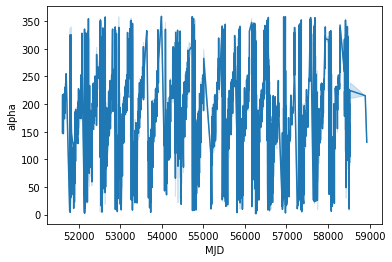

In [31]:
sns.lineplot(data=data, x="MJD", y='alpha') # посмотрим, как значения признака зависят от времени

In [32]:
d = data['delta'].value_counts(bins = 5) # разделим значения признака на 5 категорий
d

(21.929, 42.286]    31293
(1.572, 21.929]     28642
(42.286, 62.643]    19268
(-18.888, 1.572]    18909
(62.643, 83.001]     1888
Name: delta, dtype: int64

<AxesSubplot:>

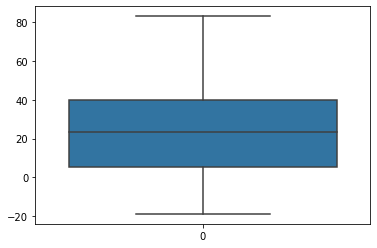

In [33]:
sns.boxplot(data=data['delta']) # выбросов нет

In [34]:
# пишем функцию для обработки диапазона
def func3(delta_col):
    if -18.888<delta_col['delta']<=1.572:
        return '(-18.888, 1.572)'
    if 1.572<delta_col['delta']<=21.929:
        return '(1.572, 21.929)'
    if 21.929<delta_col['delta']<=42.286:
        return '(21.929, 42.286)'
    if 42.286<delta_col['delta']<=62.643:
        return '(42.286, 62.643)'                        
    else:
        return '(62.643, 83.001)'

In [35]:
data['delta_cat'] = data.apply(lambda delta_col:func3(delta_col), axis = 1)
data['delta_cat']

0        (21.929, 42.286)
1        (21.929, 42.286)
2        (21.929, 42.286)
3        (-18.888, 1.572)
4         (1.572, 21.929)
               ...       
99995    (-18.888, 1.572)
99996     (1.572, 21.929)
99997     (1.572, 21.929)
99998    (42.286, 62.643)
99999    (42.286, 62.643)
Name: delta_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,delta_cat'>

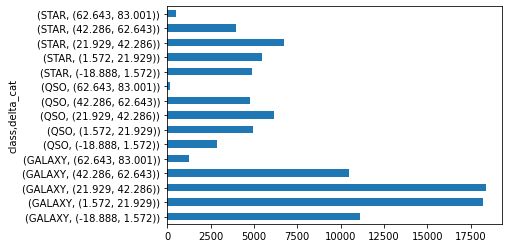

In [36]:
data.groupby(['class','delta_cat'])['delta_cat'].count().plot(kind='barh') # посмотрим на распределение признака dalta по признаку class

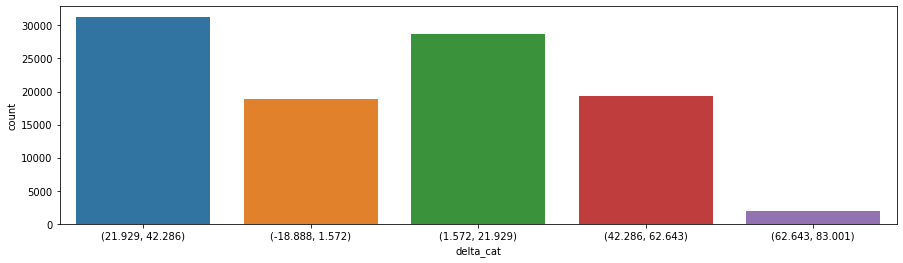

In [37]:
dd = sns.countplot(x='delta_cat', data=data) # распределение количества записей по категориям
dd.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='delta'>

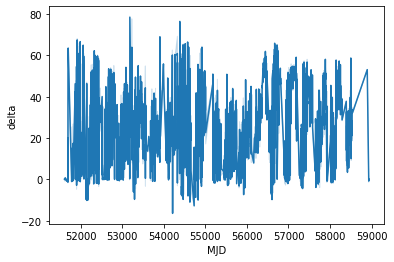

In [38]:
sns.lineplot(data=data, x="MJD", y='delta') # посмотрим, как значения признака зависят от времени

In [39]:
u = data['u'].value_counts(bins = 5) # разделим значения признака на 5 категорий
u

(-1973.575, 32.781]        99999
(-10009.033, -7992.644]        1
(-7992.644, -5986.287]         0
(-5986.287, -3979.931]         0
(-3979.931, -1973.575]         0
Name: u, dtype: int64

<AxesSubplot:>

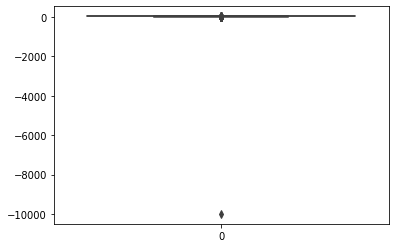

In [40]:
sns.boxplot(data=data['u']) # видим выбросы

In [41]:
# устраняем выбросы
data['u'] = data['u'][(data['u'] >= 16) & (data['u'] <= 29)]

<AxesSubplot:>

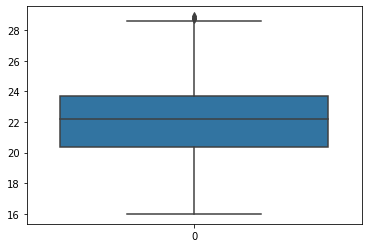

In [42]:
sns.boxplot(data=data['u'])

In [43]:
u = data['u'].value_counts(bins = 5) # снова разделим значения признака на 5 категорий
u

(21.162, 23.742]    40920
(18.582, 21.162]    28996
(23.742, 26.322]    22153
(15.989, 18.582]     5663
(26.322, 28.902]     2105
Name: u, dtype: int64

In [44]:
# пишем функцию для обработки диапазона
def func4(u_col):
    if 15.989<u_col['u']<=18.582:
        return '(15.989, 18.582)'
    if 18.582<u_col['u']<=21.162:
        return '(18.582, 21.162)'
    if 21.162<u_col['u']<=23.742:
        return '(21.162, 23.742)'
    if 23.742<u_col['u']<=26.322:
        return '(23.742, 26.322)'                        
    else:
        return '(26.322, 28.902)'

In [45]:
data['u_cat'] = data.apply(lambda u_col:func4(u_col), axis = 1)
data['u_cat']

0        (23.742, 26.322)
1        (23.742, 26.322)
2        (23.742, 26.322)
3        (21.162, 23.742)
4        (18.582, 21.162)
               ...       
99995    (21.162, 23.742)
99996    (21.162, 23.742)
99997    (21.162, 23.742)
99998    (23.742, 26.322)
99999    (21.162, 23.742)
Name: u_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,u_cat'>

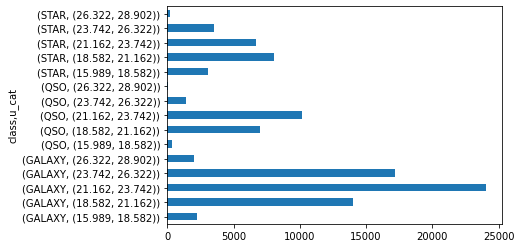

In [46]:
data.groupby(['class','u_cat'])['u_cat'].count().plot(kind='barh') # посмотрим на распределение признака u по признаку class

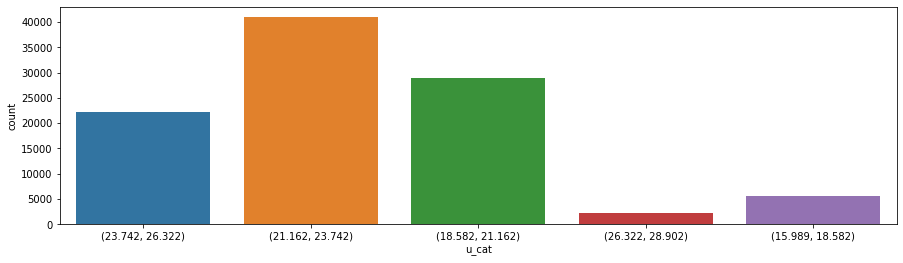

In [47]:
uu = sns.countplot(x='u_cat', data=data) # распределение количества записей по категориям
uu.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='u'>

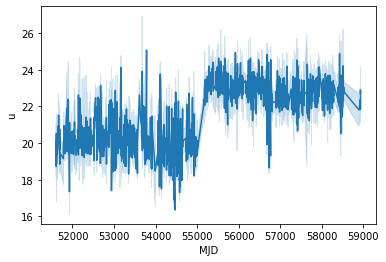

In [48]:
sns.lineplot(data=data, x="MJD", y='u') # посмотрим, как значения признака зависят от времени

In [49]:
g = data['g'].value_counts(bins = 5) # разделим значения признака на 5 категорий
g

(-1974.518, 31.602]                99999
(-10009.032000000001, -7992.88]        1
(-7992.88, -5986.759]                  0
(-5986.759, -3980.639]                 0
(-3980.639, -1974.518]                 0
Name: g, dtype: int64

<AxesSubplot:>

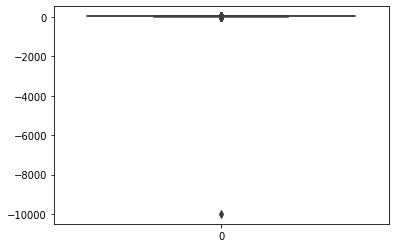

In [50]:
sns.boxplot(data=data['g']) # видим выбросы

In [51]:
# устраняем выбросы
data['g'] = data['g'][(data['g'] >= 15) & (data['g'] <= 27)]

<AxesSubplot:>

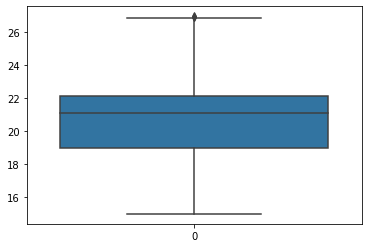

In [52]:
sns.boxplot(data=data['g'])

In [53]:
g = data['g'].value_counts(bins = 5) # снова разделим значения признака на 5 категорий
g

(19.781, 22.171]    43937
(17.392, 19.781]    25229
(22.171, 24.561]    22757
(14.989, 17.392]     6704
(24.561, 26.951]     1087
Name: g, dtype: int64

In [54]:
# пишем функцию для обработки диапазона
def func5(g_col):
    if 14.989<g_col['g']<=17.392:
        return '(14.989, 17.392)'
    if 17.392<g_col['g']<=19.781:
        return '(17.392, 19.781)'
    if 19.781<g_col['g']<=22.171:
        return '(19.781, 22.171)'
    if 22.171<g_col['g']<=24.561:
        return '(22.171, 24.561)'                        
    else:
        return '(24.561, 26.951)'

In [55]:
data['g_cat'] = data.apply(lambda g_col:func5(g_col), axis = 1)
data['g_cat']

0        (22.171, 24.561)
1        (22.171, 24.561)
2        (22.171, 24.561)
3        (22.171, 24.561)
4        (17.392, 19.781)
               ...       
99995    (22.171, 24.561)
99996    (22.171, 24.561)
99997    (17.392, 19.781)
99998    (19.781, 22.171)
99999    (19.781, 22.171)
Name: g_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,g_cat'>

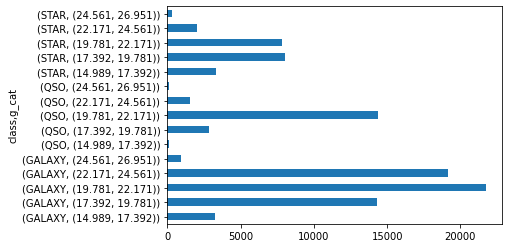

In [56]:
data.groupby(['class','g_cat'])['g_cat'].count().plot(kind='barh') # посмотрим на распределение признака g по признаку class

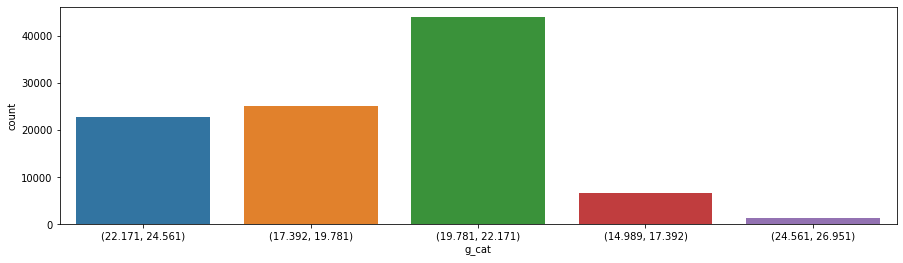

In [57]:
gg = sns.countplot(x='g_cat', data=data) # распределение количества записей по категориям
gg.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='g'>

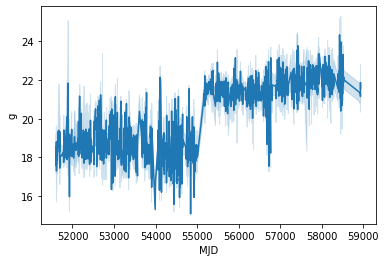

In [58]:
sns.lineplot(data=data, x="MJD", y='g') # посмотрим, как значения признака зависят от времени

In [59]:
i = data['i'].value_counts(bins = 5) # разделим значения признака на 5 категорий
i

(18.539, 23.073]    65757
(14.004, 18.539]    33845
(9.446, 14.004]       235
(23.073, 27.607]      157
(27.607, 32.141]        6
Name: i, dtype: int64

<AxesSubplot:>

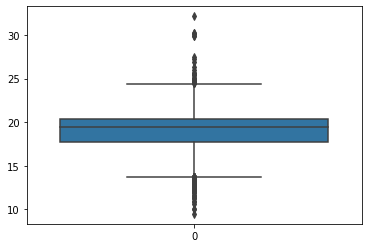

In [60]:
sns.boxplot(data=data['i']) # видим выбросы

In [61]:
# устраняем выбросы
data['i'] = data['i'][(data['i'] >= 14) & (data['i'] <= 25)]

<AxesSubplot:>

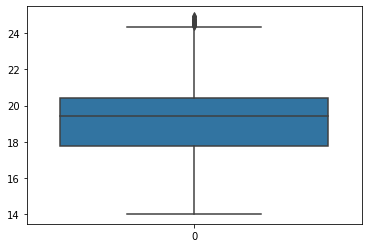

In [62]:
sns.boxplot(data=data['i'])

In [63]:
i = data['i'].value_counts(bins = 5) # снова разделим значения признака на 5 категорий
i

(18.377, 20.565]    46434
(16.189, 18.377]    25847
(20.565, 22.754]    21437
(13.989, 16.189]     5806
(22.754, 24.942]      225
Name: i, dtype: int64

In [64]:
# пишем функцию для обработки диапазона
def func6(i_col):
    if 13.989<i_col['i']<=16.189:
        return '(13.989, 16.189)'
    if 16.189<i_col['i']<=18.377:
        return '(16.189, 18.377)'
    if 18.377<i_col['i']<=20.565:
        return '(18.377, 20.565)'
    if 20.565<i_col['i']<=22.754:
        return '(20.565, 22.754)'                        
    else:
        return '(22.754, 24.942)'

In [65]:
data['i_cat'] = data.apply(lambda i_col:func6(i_col), axis = 1)
data['i_cat']

0        (18.377, 20.565)
1        (20.565, 22.754)
2        (18.377, 20.565)
3        (18.377, 20.565)
4        (13.989, 16.189)
               ...       
99995    (20.565, 22.754)
99996    (18.377, 20.565)
99997    (16.189, 18.377)
99998    (18.377, 20.565)
99999    (18.377, 20.565)
Name: i_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,i_cat'>

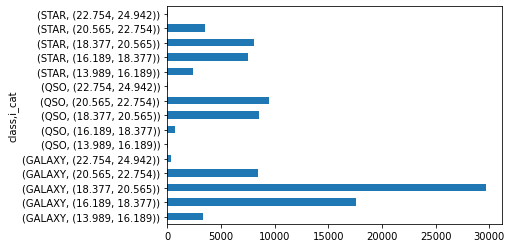

In [66]:
data.groupby(['class','i_cat'])['i_cat'].count().plot(kind='barh') # посмотрим на распределение признака i по признаку class

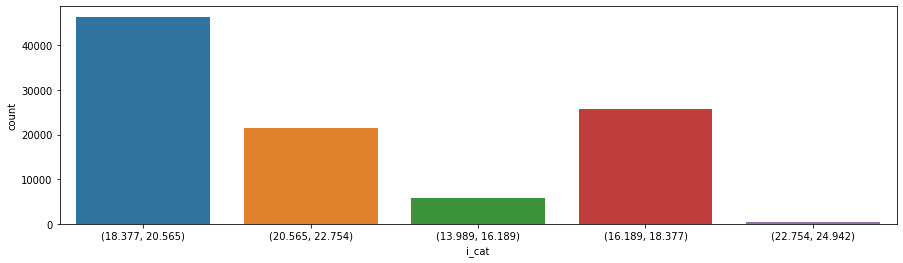

In [67]:
ii = sns.countplot(x='i_cat', data=data) # распределение количества записей по категориям
ii.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='i'>

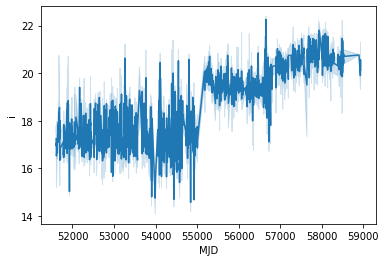

In [68]:
sns.lineplot(data=data, x="MJD", y='i') # посмотрим, как значения признака зависят от времени

In [69]:
r = data['r'].value_counts(bins = 5) # разделим значения признака на 5 категорий
r

(17.722, 21.672]    67764
(13.772, 17.722]    20322
(21.672, 25.622]    11784
(9.801, 13.772]       118
(25.622, 29.572]       12
Name: r, dtype: int64

<AxesSubplot:>

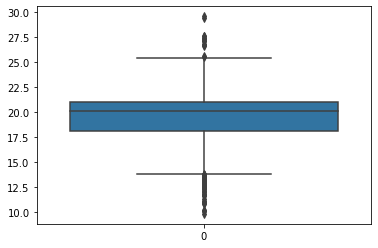

In [70]:
sns.boxplot(data=data['r']) # видим выбросы

In [71]:
# устраняем выбросы
data['r'] = data['r'][(data['r'] >= 14) & (data['r'] <= 26)]

<AxesSubplot:>

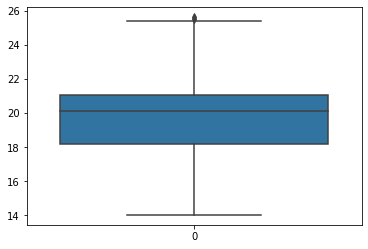

In [72]:
sns.boxplot(data=data['r'])

In [73]:
r = data['r'].value_counts(bins = 5) # снова разделим значения признака на 5 категорий
r

(18.647, 20.967]                43537
(20.967, 23.287]                26427
(16.327, 18.647]                24970
(13.995000000000001, 16.327]     4471
(23.287, 25.607]                  434
Name: r, dtype: int64

In [74]:
# пишем функцию для обработки диапазона
def func7(r_col):
    if 13.995<r_col['r']<=16.327:
        return '(13.995, 16.327)'
    if 16.327<r_col['r']<=18.647:
        return '(16.327, 18.647)'
    if 18.647<r_col['r']<=20.967:
        return '(18.647, 20.967)'
    if 20.967<r_col['r']<=23.287:
        return '(20.967, 23.287)'                        
    else:
        return '(23.287, 25.607)'

In [75]:
data['r_cat'] = data.apply(lambda r_col:func7(r_col), axis = 1)
data['r_cat']

0        (18.647, 20.967)
1        (20.967, 23.287)
2        (18.647, 20.967)
3        (20.967, 23.287)
4        (16.327, 18.647)
               ...       
99995    (20.967, 23.287)
99996    (18.647, 20.967)
99997    (16.327, 18.647)
99998    (18.647, 20.967)
99999    (18.647, 20.967)
Name: r_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,r_cat'>

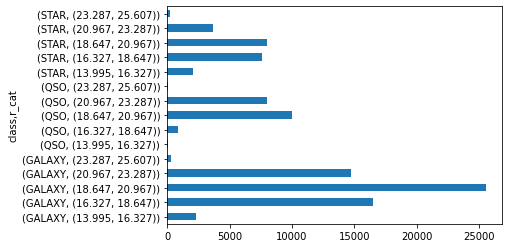

In [76]:
data.groupby(['class','r_cat'])['r_cat'].count().plot(kind='barh') # посмотрим на распределение признака r по признаку class

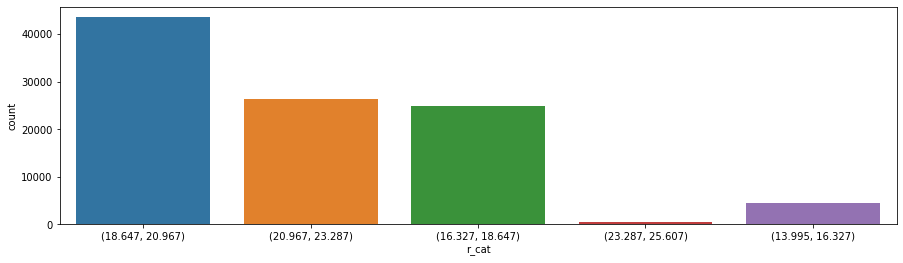

In [77]:
rr = sns.countplot(x='r_cat', data=data) # распределение количества записей по категориям
rr.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='r'>

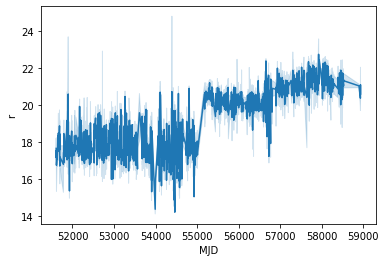

In [78]:
sns.lineplot(data=data, x="MJD", y='r') # посмотрим, как значения признака зависят от времени

In [79]:
z = data['z'].value_counts(bins = 5) # разделим значения признака на 5 категорий
z

(-1976.293, 29.384]        99999
(-10009.029, -7993.323]        1
(-7993.323, -5987.647]         0
(-5987.647, -3981.97]          0
(-3981.97, -1976.293]          0
Name: z, dtype: int64

<AxesSubplot:>

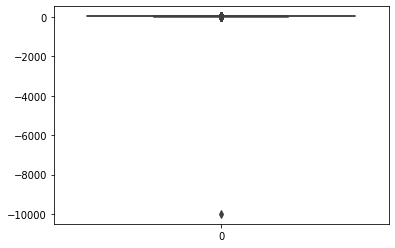

In [80]:
sns.boxplot(data=data['z']) # видим выбросы

In [81]:
# устраняем выбросы
data['z'] = data['z'][(data['z'] >= 14) & (data['z'] <= 24)]

<AxesSubplot:>

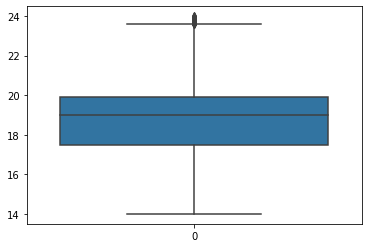

In [82]:
sns.boxplot(data=data['z'])

In [83]:
z = data['z'].value_counts(bins = 5) # снова разделим значения признака на 5 категорий
z

(17.998, 19.996]    45549
(16.001, 17.998]    24525
(19.996, 21.993]    21329
(13.992, 16.001]     6312
(21.993, 23.99]      1903
Name: z, dtype: int64

In [84]:
# пишем функцию для обработки диапазона
def func8(z_col):
    if 13.992<z_col['z']<=16.001:
        return '(13.992, 16.001)'
    if 16.001<z_col['z']<=17.998:
        return '(16.001, 17.998)'
    if 17.998<z_col['z']<=19.996:
        return '(17.998, 19.996)'
    if 19.996<z_col['z']<=21.993:
        return '(19.996, 21.993)'                        
    else:
        return '(21.993, 23.99)'

In [85]:
data['z_cat'] = data.apply(lambda z_col:func8(z_col), axis = 1)
data['z_cat']

0        (17.998, 19.996)
1        (19.996, 21.993)
2        (17.998, 19.996)
3        (17.998, 19.996)
4        (13.992, 16.001)
               ...       
99995    (19.996, 21.993)
99996    (17.998, 19.996)
99997    (16.001, 17.998)
99998    (17.998, 19.996)
99999    (17.998, 19.996)
Name: z_cat, Length: 100000, dtype: object

<AxesSubplot:ylabel='class,z_cat'>

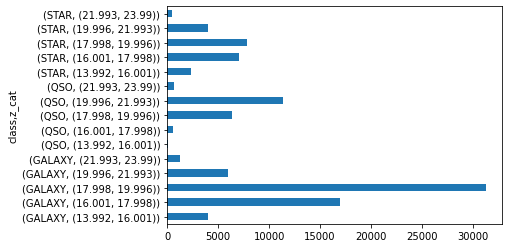

In [86]:
data.groupby(['class','z_cat'])['z_cat'].count().plot(kind='barh') # посмотрим на распределение признака z по признаку class

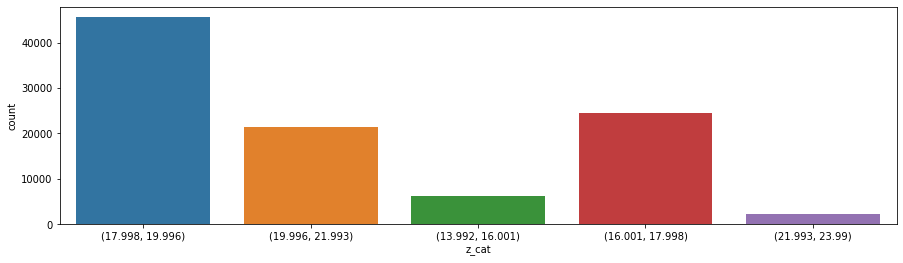

In [87]:
zz = sns.countplot(x='z_cat', data=data) # распределение количества записей по категориям
zz.figure.set_figwidth(15)

<AxesSubplot:xlabel='MJD', ylabel='z'>

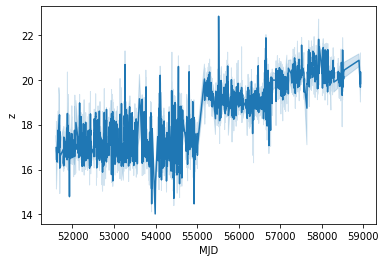

In [88]:
sns.lineplot(data=data, x="MJD", y='z') # посмотрим, как значения признака зависят от времени

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


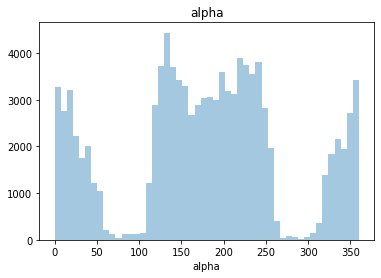

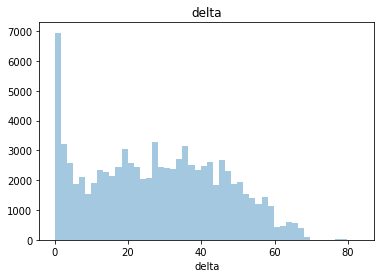

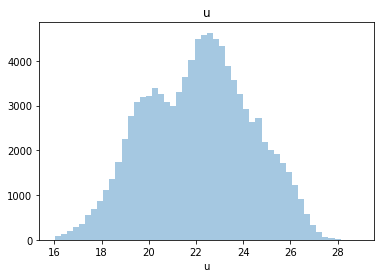

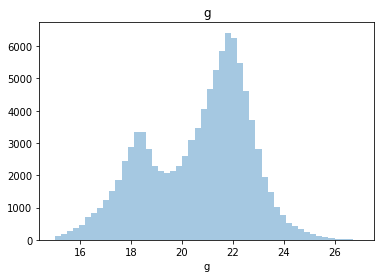

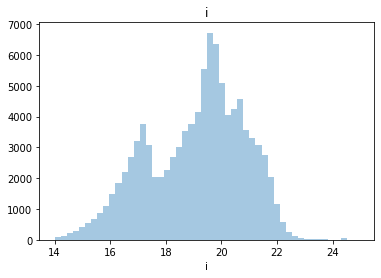

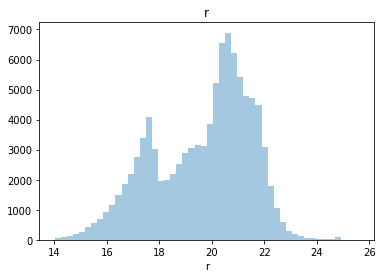

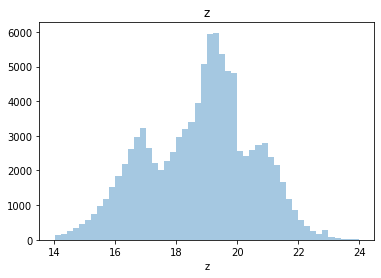

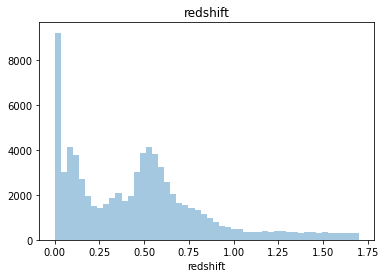

In [89]:
# посмотрим на распределение числовых признаков после удаления выбросов
for i in num_cols:
    plt.figure()
    sns.distplot(data[i][data[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

<AxesSubplot:>

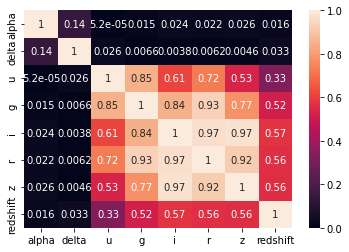

In [90]:
# построим матрицу корреляции для числовых переменных
# видно, что признаки сильно скореллированы друг с другом, за исключением alpha & delta
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)